## El codigo es el de Iteration

<div style="text-align:center">
    <h1>
        Value Iteration
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to look at a dynamic programming algorithm called value iteration. In it, we will sweep the state space and update all the V(s) values.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 3 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [35]:
env = Maze()

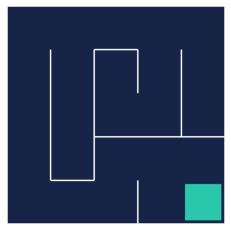

In [36]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [37]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

# nvec -> numero de filas y columntas
# n -> numero de acciones disponibles para el agente
env.close()

Observation space shape: [5 5]
Number of actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [38]:
# las filas son 4 (up, down,...)  5 tablas de 5x4 con 0.25
policy_probs = np.full((5, 5, 4), 0.25)

In [39]:
# toma un estado y devuelve cada una de las % que tiene disponibles
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [40]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

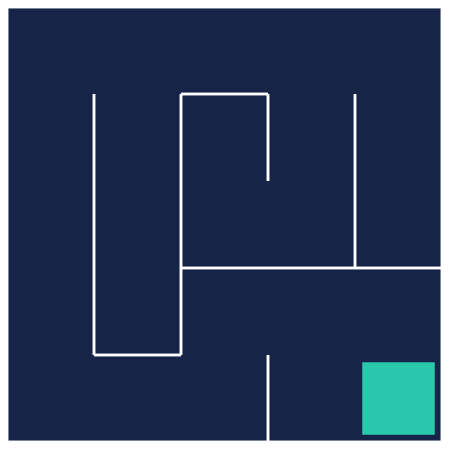

In [41]:
test_agent(env, policy, episodes=1)

#### Plot the policy

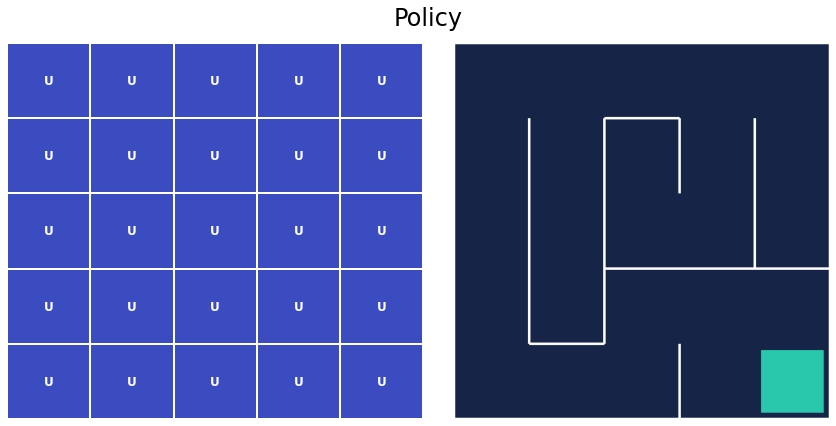

In [42]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [43]:
state_values = np.zeros(shape=(5,5))

#### Plot $V(s)$

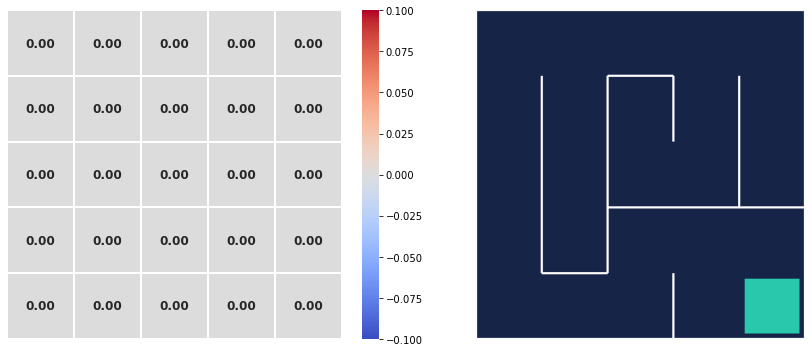

In [44]:
plot_values(state_values, frame)

## Implement the Value Iteration algorithm

</br>


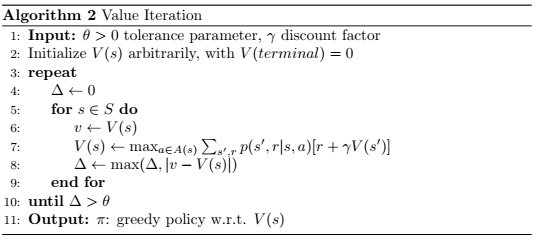

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

Con cada iteracion nos acercamos a $v_\pi$

$v_0$ -> $v_1$ -> $v_2$ -> ... -> $v_\pi$

In [45]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    
    while delta > theta:
        delta = 0
        
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row,col)]
                new_value = 0.
                action_probabilities = policy_probs[(row,col)]
                
                for action, prob in enumerate(action_probabilities):
                    # indice y probabilidad de tomar la accion
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    # aplico la formula
                    new_value += prob * (reward + gamma * state_values[next_state])
                
                state_values[(row,col)] = new_value
                
                delta = max(delta, abs(old_value - new_value))

In [46]:
def policy_improvement(policy_probs, state_values, gamma=0.99):
    policy_stable = True
    
    for row in range(5):
        for col in range(5):
            old_action = policy_probs[(row,col)].argmax()
            
            new_action = None
            max_qsa = float("-inf")
            
            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row, col), action)
                qsa = reward + gamma * state_values[next_state]
                
                if qsa > max_qsa:
                    new_action = action
                    max_qsa = qsa
                
            action_probs = np.zeros(4)
            action_probs[new_action] = 1.
            policy_probs[(row, col)] = action_probs
            
            if new_action != old_action:
                policy_stable = False
                
                
    return policy_stable

## Show results

#### Show resulting value table $V(s)$

In [47]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    policy_stable = False
    
    while not policy_stable:
        
        policy_evaluation(policy_probs, state_values, theta, gamma)
        plot_values(state_values, frame)
        policy_stable = policy_improvement(policy_probs, state_values, gamma)
        plot_policy(policy_probs, frame)
        

#### Show resulting policy $\pi(\cdot|s)$

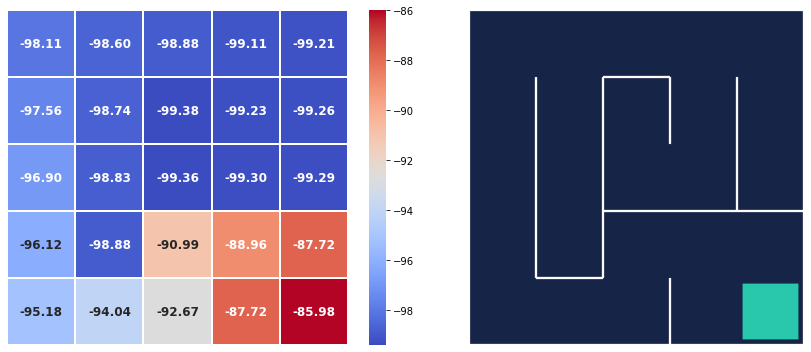

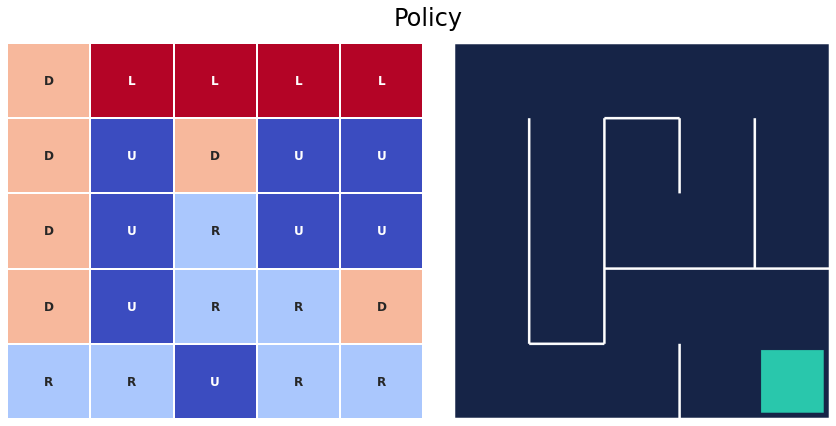

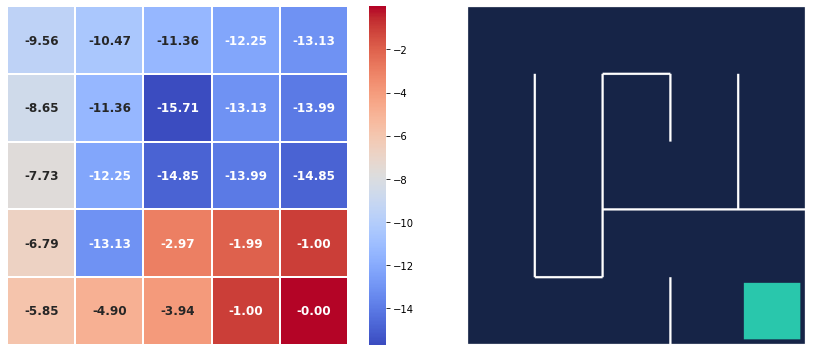

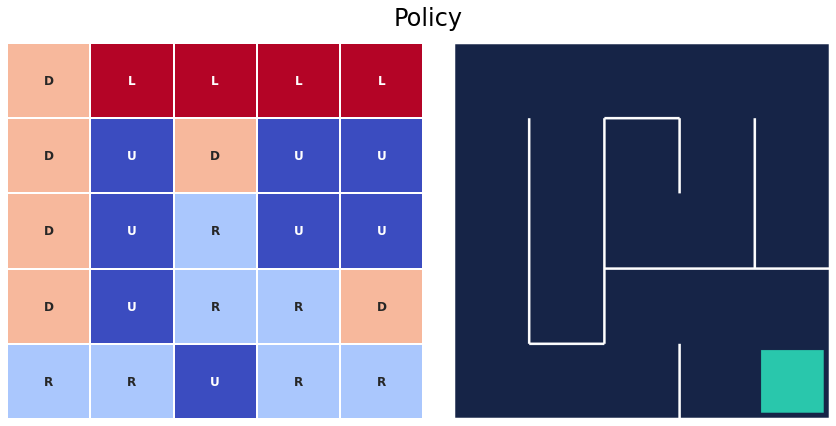

In [48]:
policy_iteration(policy_probs, state_values)

#### Test the resulting agent

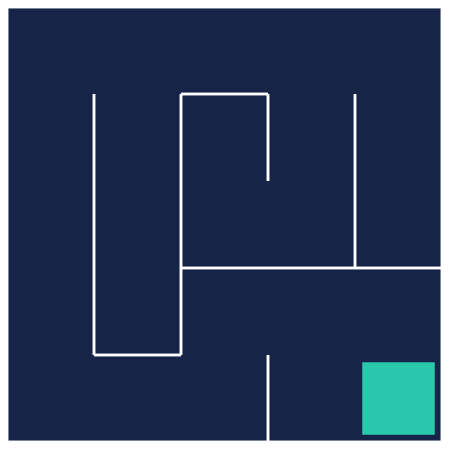

In [49]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)